# Diamond Price Prediction

### Problem Statement

We are provided with the dataset containing the prices and other attributes of almost 193573 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. We have to help the company in predicting the price for the stone on the basis of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have a better profit share.

### Data Description :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)


### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')


### Data Ingesetion

In [4]:
df=pd.read_csv('data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
df.tail()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681
193572,193572,0.71,Good,E,SI2,60.8,64.0,5.73,5.71,3.48,2258


In [5]:
df.shape

(193573, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


### Missing Value

In [8]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

#### Observation --> 
No missing values present in the data

### Duplicates Values

In [9]:
df.duplicated().sum()

0

#### Observation --> 
No Duplicates values present in the data

In [10]:
# Id column does not provide any releavent information so we have decided to drop the column

## Lets drop the id column
df=df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


### Segregate Features and Categorical Features

In [6]:
numerical_feature=df.columns[df.dtypes!='object']
categorical_feature=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_feature)
print('Categorical Columns:',categorical_feature)

Numerical columns: Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [7]:
df[numerical_feature]

,id,carat,depth,table,x,y,z,price
0,0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...
193568,193568,0.31,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,62.9,55.0,4.45,4.49,2.81,681


In [8]:
df[categorical_feature]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [14]:
df[categorical_feature].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


## Analyzing Categorical Features

In [15]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [16]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [17]:
df['color'].unique()


array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [18]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [19]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [20]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

### Plotting Numerical Features

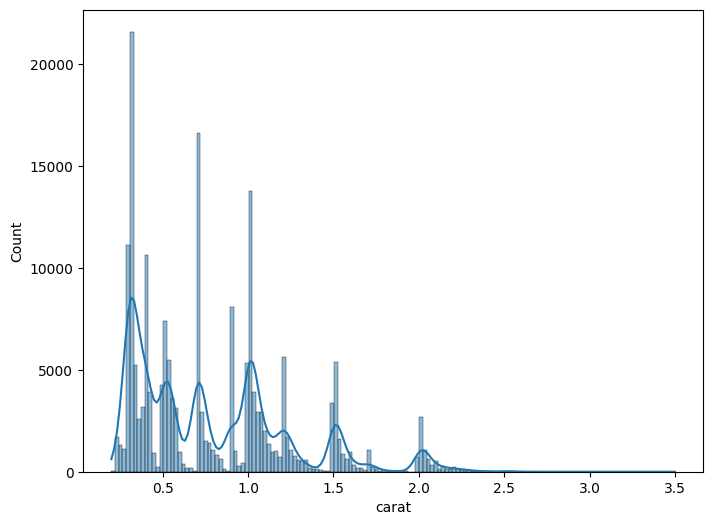

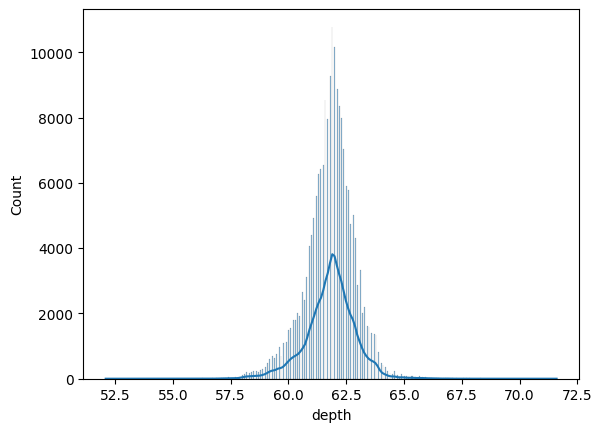

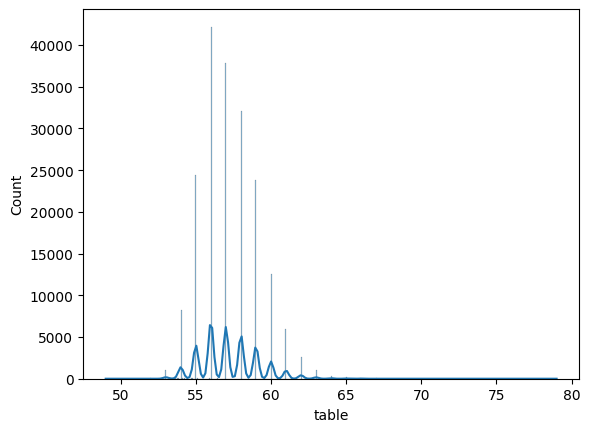

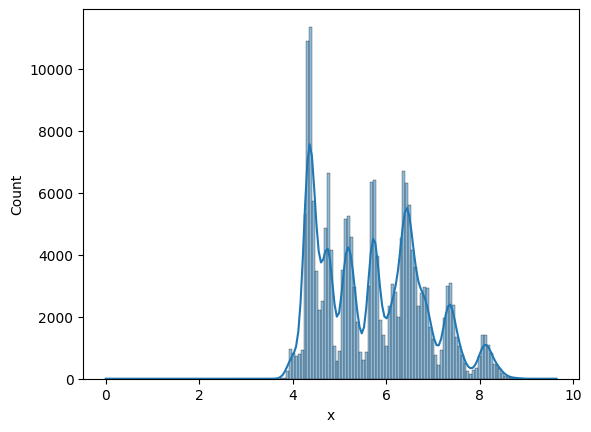

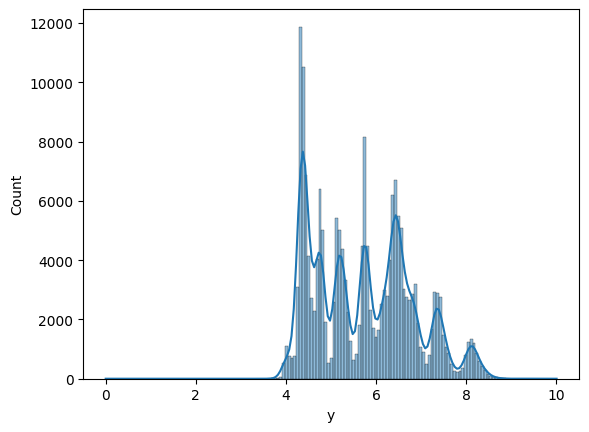

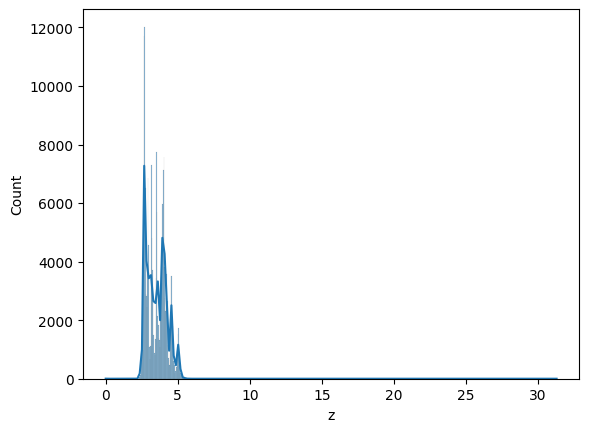

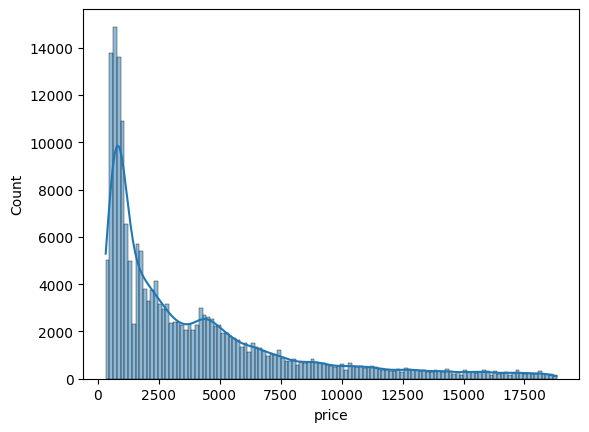

In [21]:
# Plotting all the numerical_columns
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))    ##Setting some fig size
x=0
for i in numerical_feature:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

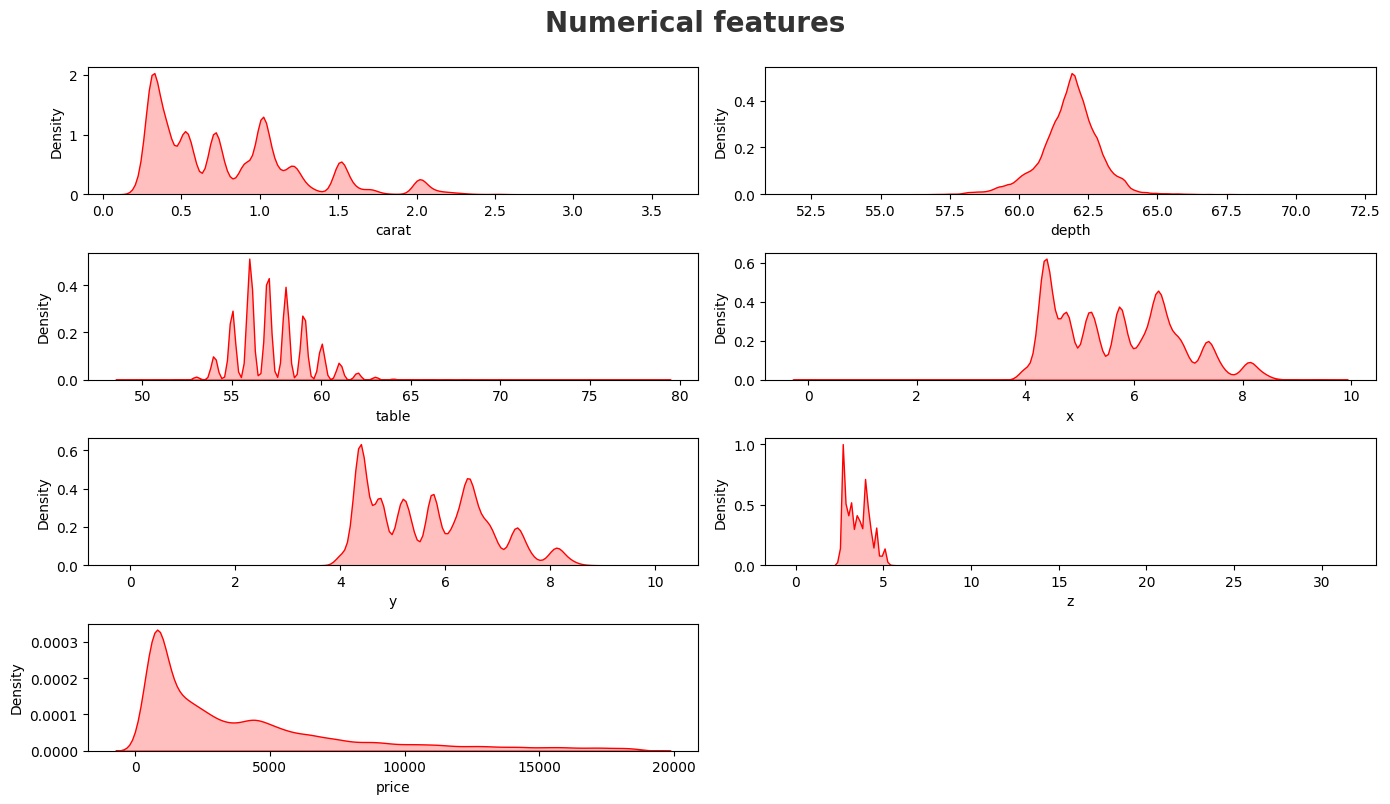

In [23]:
plt.figure(figsize=(14,8))
plt.suptitle('Numerical features',fontsize=20, fontweight = 'bold', alpha=0.8,y=1)

for i in range(0, len(numerical_feature)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(x=df[numerical_feature[i]],shade=True,color='red')
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

## Categorical Features

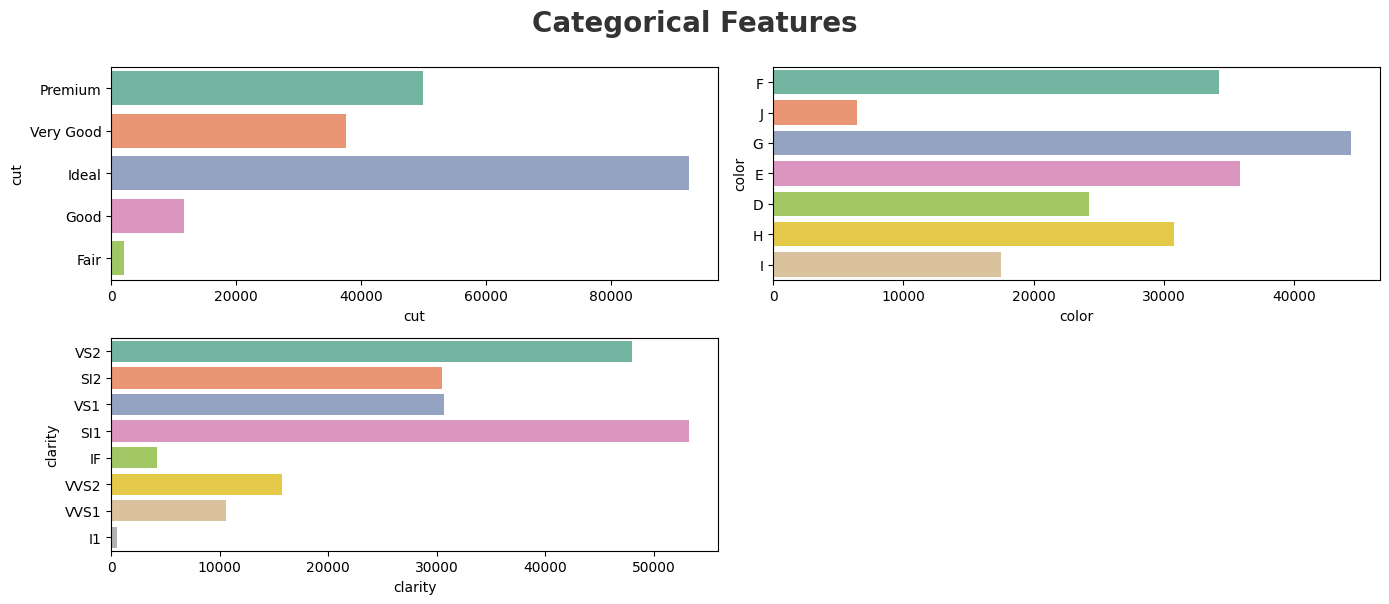

In [25]:
plt.figure(figsize=(14,6))
plt.suptitle('Categorical Features',fontsize=20, fontweight = 'bold', alpha=0.8,y=1)

for i in range(0, len(categorical_feature)):
    plt.subplot(2,2,i+1)
    sns.countplot(y = df[categorical_feature[i]],palette = "Set2")
    plt.xlabel(categorical_feature[i])
    plt.tight_layout()

### Observation ---

* In Cut Category: Ideal has Maximum sales folows Premiium and very good cut category
* In Color: G code color which is Near Colorless Gemstone has highest sales adnd demand followed by F and E. They both are Fully Colorless Gemstone.
* In Clarity: Sl 1 has highest sales which comes under Slighlty Included category means that the diamond's  inclusions cannot be seen with the unaided eye but are visible with 10x magnification.

## Correlation Matrix

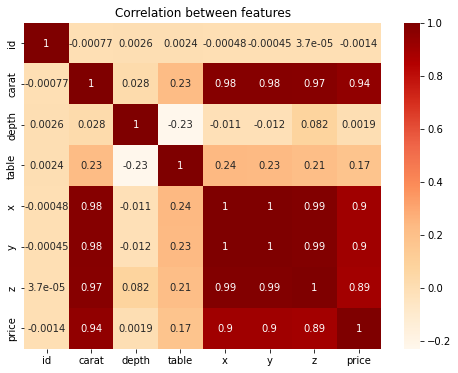

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap="OrRd", annot=True)
plt.title("Correlation between features")
plt.show()

### Observation:--

* Carat with z, carat with y, carat with x are HIGhLY CORRELATED and they are Independent features 
* Carat and price are also highy correlated but Price is Dependend feature.


In [29]:
##Currently we will not execute this
## df.drop(labels=['x','y','z'],axis=1)

## Carat

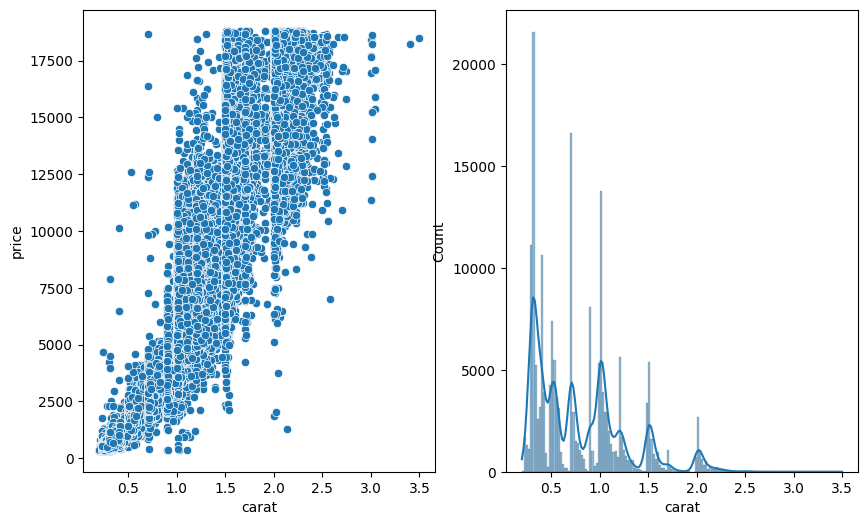

In [31]:
# Carat and Price column analysis 

fig = plt.figure()

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.scatterplot(data=df,x='carat',y='price',ax=ax1)

sns.histplot(data=df,x='carat',kde=True,ax=ax2)
fig.set_size_inches(10,6)

plt.show()

### Observation:--

* We can clearly see a positive correlation between carat and price.
* Our histplot shows that the majority of the data is located between 0.3 and 1.3 carats.
* There are outliers, but they are important to the price since it rises as the carat size increases. Because bigger diamonds are uncommon, modeling can benefit significantly from these outliers.

## Cut

In [32]:
df1 = df.groupby(['cut']).mean().reset_index()
df2 = df.groupby(['cut']).median().reset_index()
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.plot(df1['cut'],df1['price'] , 'go-', linewidth=2, markersize=12,c='red',label='mean price')
plt.plot(df2['cut'],df2['price'],'go-', linewidth=2, markersize=12,label="median price")
plt.title("Cut with Price")
plt.xlabel("Cuts")
plt.ylabel("Price")
plt.legend()

plt.subplot(1,2,2)
plt.plot(df1['cut'],df1['carat'] , 'go-', linewidth=2, markersize=12,c='red',label='mean carat')
plt.plot(df2['cut'],df2['carat'],'go-', linewidth=2, markersize=12,label="median carat")
plt.title("Cut with Carat")
plt.xlabel("Cuts")
plt.ylabel("Carat")
plt.legend()
plt.show()

TypeError: Could not convert FGHGGIHFHEDGDHHGFFDEGFEGIGGGDIIEGFHDDEGEDDGJHDGDHFEGHFEEGDGFGFDIGFGHHDFHHDGDJJGGGIHHGIDHGHGFEJIDJIFGEJFHFFFFDEGFGIEJFFFGEEFGEGHFEFHFEFHJEGFFEFJFDHJFGFHDGHEDFHGJGHIGFDEFFGGHIEGHEFGHJEHIEGFEEGHGHGEGGEHGEHIGJDHGIIHGIGIFDEGIGHDHHDHGHGEDHIEGHEIFDDFDEGIFIIFEGEHIGFFJHEHGGGEIFDFIHGFFDGGGDGDDDFFIFEHFEDIDGFEGEGDGFJIGDFHDHFJGFDJJEHHHDGIGHHHDFFFGIEDGHGHFHHDHEFIDDGFFHDEFGFJDGFFEFFIGHFHHHDGHGIJFHEJGJFFEFEJHFHFEHFEFFJHGFHGFGHGGFIEGDEJEGDGFGIDHDFDDGDGGIGEDEDGHGGGIGHFGHEHGFFGIFGEEEEHFDGHGGEIGEFFIHIDHFDEGFHHFGDFGIFIDEEHHGDGDHHGGFEDHGIDDDEJIEGHFFEJHEEGDFIFFGHFHGFDFDGFFEEEEHIFGHGDEHDHEFGGFIHDDIHFGEFFDJHEGDHHGHDDFDHGIFDJEEHGHDHFFDDHJEGEDEJJDHEFGGGJEHHIGDDEFDHFGDGIGEDEJIGHEEEGHIGEHGFGHEDGEIGGHIFHGHFGHDFIFFIHHHDGFHFEFDEHEFGIJIFFFGHHJFGFFIEDFDEHIEJHGHEFGFGFHFGHFGFFHEHFHDFHEGEFJFDHGJDFGFEGDGEFGDFHEJHHHGJFDHGHHJEHFHHFHFDEEIDIGFEJGDIFIDGFFGGIFFEGFDHGJJFGFGEGHGGFGEHFEFFIIDEEFDHEHIFEEFDIHDFIHGHJFEDGGHHDFHFEGGHFGHHGFDHDFJIEGHFJHGHDFIHDGIDIGIFGHDHHGHIHGFFIFIFEFHIHHIGGIGEDEEDFFDDIFDFFFGGGEEHFJHEHIFHIFEEEEFEEIFDEFGHEGIEGGHHGEGGEGFFGHHHEJGGHFGFEDGJFFDEIEDGFGHGHHDGGFIFGFGHFFFFFDGIDFEJGGFEIGFHHGDGDJEDFHGGIEDHEIIEGHGEEEDEEIIHHFEFJGFFEEHDIJHEIEEIDIFIIHGGDEGDIGEFIGFJFFEHHDEEHEHDFFFHEEJHEIIGDEDGFHGHEGFFIIFEFEHHHGHJDHDFEGGFEIGJEGHIFEJDHFGFDDHFHFGIIHHHGHGFFJGFHDFDHEHHIJIEFFDIEEFFGHGGFFGGIFFGGHDFGJFIDEEEIDGGDEFEHJFJDGGGGFDGGIDGFGJFEEHEFHHGFFHHHHHDDIIGGIJIHGFHDGFDHIHGHFGFHGFIJHGDIGGGEHDFEIIDJEHIFGIDIEGGFHEFEGFJEJFFHEHDIDGJEIDFFFEDFFHFGFIIFEGHEFDFHFFFGGFFFDFEFHFIEFGJEHGGFDEGGGFGEJGFEEFDFFFHIGEHEGFFGHGFFHHDGFFEHDHEHFEJGEDFGHGGEHJJHGGGDHHHFHIDGDHFHFHDIGJEEFGEGJEEFFHFIDHIJFHIEGFJGGDDHEEEGJGFHFEIFDFFFHHIHFHFFIHHGGDGGGDIJJFHHFFEFIDFFEHDEFIFFEFFIGFFEFFJDHFGDDIGEIHHGEHFGGFFJDDHDFFGEGGFHFJGFGIHFFDEEGIDIIEIFHFEGIGFJGEGDGEDJFDFIHDFFFFFHEDGHEEFGFFDFFHHFFFJEDGHEDIJHGDDGEFGFHHIFGIHFGEFEFGJHFIDDFDGIHIHDHGGFHHEDGFJGFGFGFGIFHDDHHEEFHHHGEHGHEGEEGHEEHDGFFGEHJFGJHIDGDHEHGIHGGGIHGHHGEFEHEFIFJGFHDHDJHIEHFDFDIHGJGDGFFFEHDFJHJGIEFGEFHGFFFFFGGEHHDDIIFFHFIGHGHFGGHHFEHFGGEFDDEDGHHFDFDJDDDEHGGFGGIEGFGGFEFGDEJDGDGDFJHGHFIEFHHIFDGHIJHEHFEHFHEEDEFEDGEIIFIDGFEI to numeric

### Observation:--

* This plot show the difference between cut such as Fair, Good, Very Good, Ideal and Premium.
* All Good, Very Good and Ideal cut diamonds weigh less than 1 carat with medain < 1.
* There are few fair cut diamonds where the weight is slightly higher than 1 carat but the median is still <=1 carat.
* Premium cut diamonds has the highest range between mean price and median price w.r.t mean carat and median carat size.


## Color

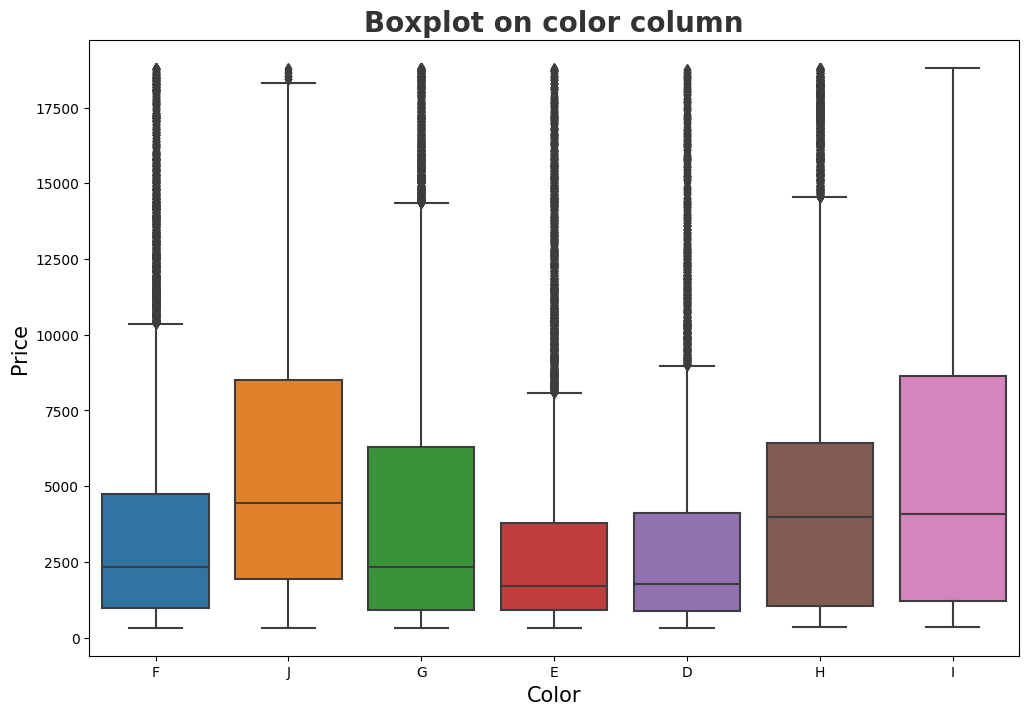

In [33]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['color'],y=df['price'])
plt.title("Boxplot on color column",fontsize=20, fontweight = 'bold', alpha=0.8,y=1)
plt.xlabel("Color",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.show()

### Observations:--  The Gemological Institute of America (GIA) grades diamonds from D to Z series. 

* D and E color grade diamonds are colorless and almost colorless. 
* F-grade diamonds are also almost colorless, but they can only be identified by professional gemologists.
* We can see that these three color grades of diamonds have too many outliers compared to other grades. In fact, we can say that for smaller carat sizes, colorless diamonds have higher prices than diamonds of other color grades.
* G and H grade diamonds are nearly colorless or next to colorless diamonds. As shown in the plot, these grades also have some outliers, but not as many as D, E, and F grades.
* Color is a major factor that defines the price of a diamond.
* I and J grade diamonds have a very slight tint of color. 
* We can see that these grade diamonds do not have as many outliers, which means that their price is justified. As the carat size increases, the price also increases


## Clarity

In [34]:
df1 = df.groupby(['clarity']).median().reset_index()
clarity = df1['clarity']
price = df1['price']
carat = df1['carat']
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))


bars1 = ax1.bar(clarity,price,label="Median price",color=(0.3, 0.6, 0.9))
ax1.set_title('Clarity With Price')
ax1.set_xlabel("clarity")
ax1.set_ylabel("price")
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, height,
            ha='center', va='bottom')
ax1.legend()


bars2 = ax2.bar(clarity,carat,label="Median carat",color='red')
ax2.set_title('Clarity With Carat')
ax2.set_xlabel("clarity")
ax2.set_ylabel("carat")
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height, height,
            ha='center', va='bottom')

ax2.legend()
plt.show()

TypeError: could not convert string to float: 'Good'

### Observation:--

* According to gia approval, 
There are 6 main categories of clarity ratings, and this figure illustrates how they differ.
* IF, VVS1, VVS2, VS1, VS2, SI1, SI2, and I1 are the major and minor categories in our situation, and they are all ranked in the same order in terms of pricing as well.
We can see that I1, which is ranked low in clearity factor, has a median price of 3355 and a carat size of 1.02, which is significantly more expensive than our first rank clearity bar, while IF, which is ranked one in clearity factor, has a median price of 979 and a carat size of 0.33.
* The median price of the S12 clearity bar is 4142, and the carat size in this clearity bar is 1.01; however, there is another important point that must be noted: the size of the carat is also larger.
Therefore, we may conclude that the prize and the carat are directly related, but the price will also rise as clarity improves

### Depth and Table

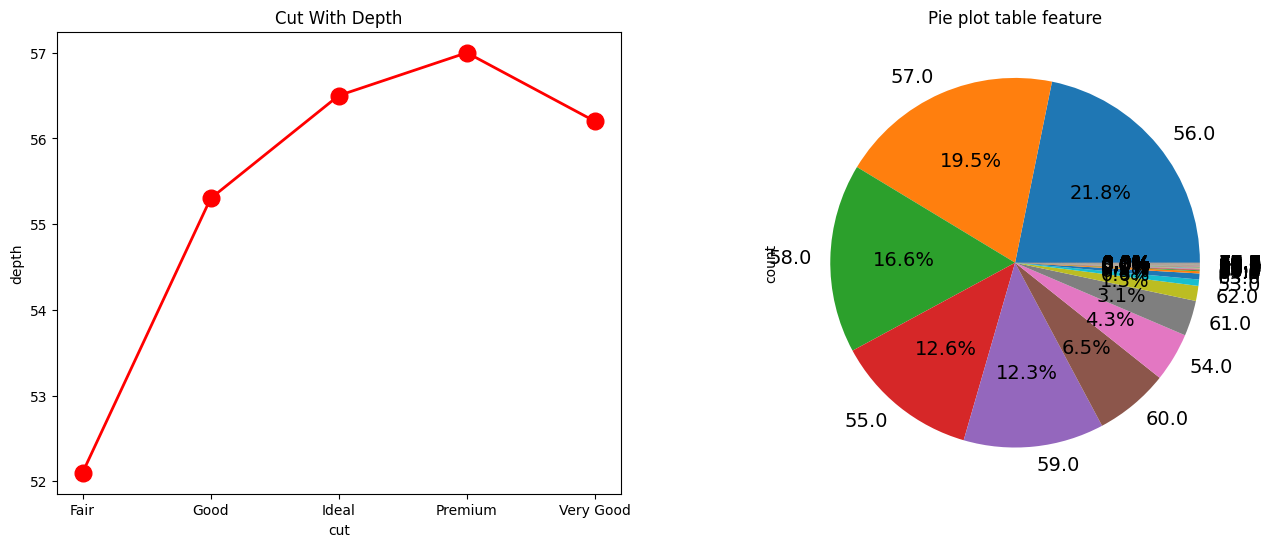

In [35]:
df1 = df.groupby(['cut']).min().reset_index()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
ax1.plot(df1['cut'],df1['depth'],'go-', linewidth=2, markersize=12,c='red')
ax1.set_title('Cut With Depth')
ax1.set_xlabel("cut")
ax1.set_ylabel("depth")
df['table'].value_counts().plot.pie(y=df['table'].value_counts().to_list()[:5],startangle=0,
                                    autopct='%1.1f%%',textprops={'fontsize': 14})
ax2.set_title('Pie plot table feature')
plt.show()

### Observation:--

* We observe from this plot that the cut depth increases depending on whether they choose an fair, ideal, premium, good or very good cut.
* The majority of the carats in the pie chart only have table sizes of 56, 57, 58, 55, 59, and 60.

In [36]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [37]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
# cut means inshort finshing. The more detailed cut rank will be High

In [38]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [39]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [40]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [41]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}
# This ranking given on the  basis of color scale 

In [42]:
df['cut']=df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [43]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


### Conclusion:

* We have converted Categorical Features into Numerical Features.
* And This structured that is useful for Model traning

In [46]:
# Saving Cleaned Data File 
df.to_csv('Cleaned_data.csv')
